### Understanding and dissecting Chowdhary and Assisi, 2019

#### To-do list

1. Two reciprocally coupled **excitatory** oscillators
	- (to observe synchrony)
2. Two reciprocally coupled **inhibitory** oscillators
	- (to observe asynchrony)
3. Bipartite networks
	1. No within-group connections
	2. Complementary edges are excitatory connections
	3. Ratio of cumulative strength of excitation/inhibition is varied
4. Balanced sudoku network

#### Imports

In [81]:
from brian2 import *

In [82]:
%matplotlib inline

#### Two reciprocally coupled excitatory oscillators

In [122]:
tau = 4*ms
I = 1.1/ms
gamma = 1/ms
eqs = '''
dv/dt = I - gamma*v : 1
'''
eqs2 = '''
dv/dt = (I/gamma - v)/tau : 1
'''

INFO       No numerical integration method specified for group 'neurongroup_3', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


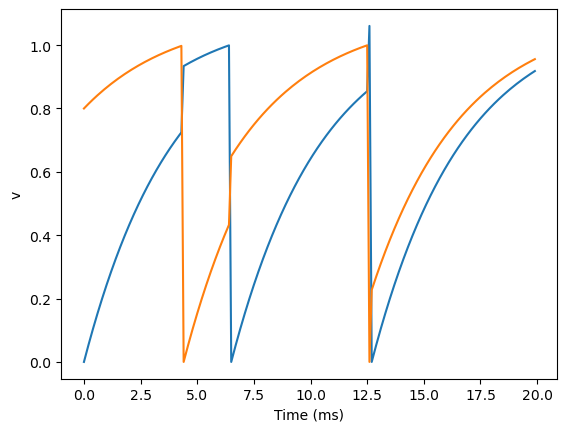

In [127]:
start_scope()

G1 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0')
G2 = NeuronGroup(1, eqs2, threshold='v>1', reset='v = 0')

G2.v = [0.8]

S1 = Synapses(G1, G2, on_pre='v_post += 0.2')
S2 = Synapses(G2, G1, on_pre='v_post += 0.2')

S1.connect()
S2.connect()

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)

run(20*ms)

plot(M1.t/ms, M1.v[0], label='Neuron 1')
plot(M2.t/ms, M2.v[0], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v');